# 패키지 임포트

In [310]:
import os
import numpy as np
from PIL import Image
import random
from matplotlib import pyplot as plt
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

# 데이터 전처리

In [311]:
# 배우 이름 저장
label = []

# 훈련/테스트 데이터
train_X = []
train_Y = []
test_X = []
test_Y = []

In [312]:
# 이미지 크기 설정
img_w = 60
img_h = 60

## 데이터 가져오기

In [313]:
data = []
classes = os.listdir("data2")


for i, cls in enumerate(classes):
    print("Openinig " + cls + "/")
    label.append(cls)
    for el in os.listdir("data2/" + cls):
        img = Image.open("data2/" + cls + "/" + el).convert('RGB')
        img = img.resize((img_w, img_h))
        data.append((np.array(img), i))
        img.close()

random.shuffle(data)

# 데이터 분할
for i in range(len(data)):
    if i < 0.8 * len(data):
        train_X.append(data[i][0])
        train_Y.append(data[i][1])
    else:
        test_X.append(data[i][0])
        test_Y.append(data[i][1])
    
train_X = (np.asarray(train_X) - np.min(train_X, axis = 0)) / (np.max(train_X, axis = 0) - np.min(train_X, axis = 0))
train_Y = np.asarray(to_categorical(train_Y))
test_X = (np.asarray(test_X) - np.min(test_X, axis = 0)) / (np.max(test_X, axis = 0) - np.min(test_X, axis = 0))
test_Y = np.asarray(to_categorical(test_Y))

Openinig 김향기/
Openinig 류승룡/
Openinig 마동석/
Openinig 설경구/
Openinig 송강호/
Openinig 오달수/
Openinig 유해진/
Openinig 이정재/
Openinig 전지현/
Openinig 정진영/
Openinig 하정우/
Openinig 황정민/


In [314]:
print(label)

['김향기', '류승룡', '마동석', '설경구', '송강호', '오달수', '유해진', '이정재', '전지현', '정진영', '하정우', '황정민']


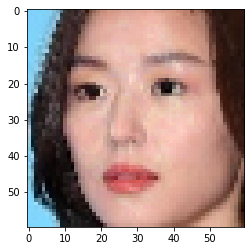

In [81]:
plt.imshow(train_X[0])
plt.show()

In [82]:
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(1301, 60, 60, 3)
(1301, 12)
(325, 60, 60, 3)
(325, 12)


In [83]:
train_Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [84]:
train_X.dtype

dtype('float64')

# 인공신경망 구축

In [85]:
EPOCHS = 150

In [86]:
# 인공신경망을 제작합니다.
model = keras.Sequential([
    keras.layers.Conv2D(16, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(12, activation="softmax")
])

In [87]:
# 인공신경망을 컴파일합니다.
model.compile(optimizer = 'adam', metrics = ['accuracy'], loss = 'categorical_crossentropy')

In [88]:
# 인공신경망을 학습시킵니다.
print("\n\n************ TRAINING START ************ ")
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10)
history = model.fit(train_X, train_Y, epochs = EPOCHS, batch_size = 10,
                    validation_data = (test_X, test_Y),
                    callbacks = [early_stop])



************ TRAINING START ************ 
Epoch 1/150
131/131 [==============================] - 2s 14ms/step - loss: 2.4895 - accuracy: 0.0992 - val_loss: 2.4664 - val_accuracy: 0.1323
Epoch 2/150
131/131 [==============================] - 2s 12ms/step - loss: 2.4745 - accuracy: 0.0992 - val_loss: 2.4685 - val_accuracy: 0.1323
Epoch 3/150
131/131 [==============================] - 2s 12ms/step - loss: 2.4509 - accuracy: 0.0938 - val_loss: 2.3624 - val_accuracy: 0.1754
Epoch 4/150
131/131 [==============================] - 2s 12ms/step - loss: 2.3453 - accuracy: 0.1468 - val_loss: 2.2853 - val_accuracy: 0.1415
Epoch 5/150
131/131 [==============================] - 2s 13ms/step - loss: 2.2649 - accuracy: 0.1706 - val_loss: 2.2501 - val_accuracy: 0.1477
Epoch 6/150
131/131 [==============================] - 2s 13ms/step - loss: 2.2321 - accuracy: 0.1606 - val_loss: 2.1709 - val_accuracy: 0.2062
Epoch 7/150
131/131 [==============================] - 2s 12ms/step - loss: 2.1661 - accurac

# 모델 성능 그래프로 나타내기

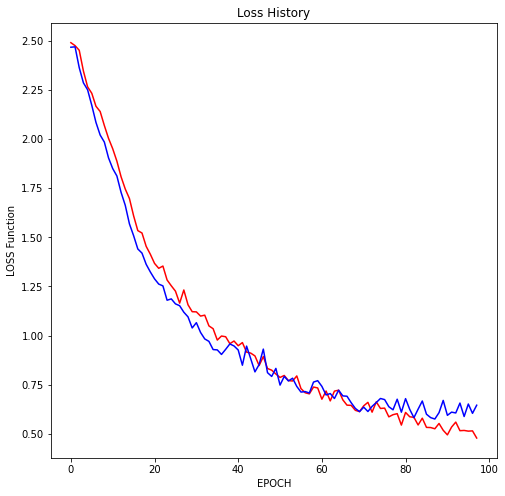

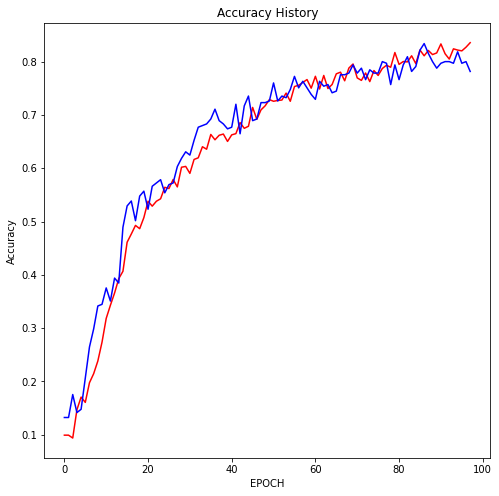

In [102]:
train_history = history.history["loss"]
validation_history = history.history["val_loss"]
fig = plt.figure(figsize=(8, 8))
plt.title("Loss History")
plt.xlabel("EPOCH")
plt.ylabel("LOSS Function")
plt.plot(train_history, "red")
plt.plot(validation_history, 'blue')
# fig.savefig("train_history.png")

train_history = history.history["accuracy"]
validation_history = history.history["val_accuracy"]
fig = plt.figure(figsize=(8, 8))
plt.title("Accuracy History")
plt.xlabel("EPOCH")
plt.ylabel("Accuracy")
plt.plot(train_history, "red")
plt.plot(validation_history, 'blue')
# fig.savefig("accuracy_history.png")

## 포스터로 테스트하기

In [336]:
# 모델 불러오기
from keras.models import load_model
model = load_model('./poster.h5')

### 포스터의 얼굴 추출하기

In [337]:
import cv2
import matplotlib.pyplot as plt

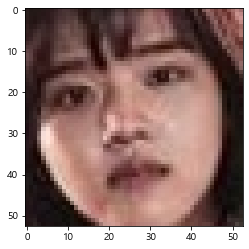

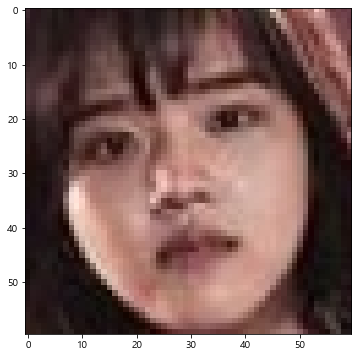

In [342]:
test_list = []

# haarcascade 불러오기
# Harr-cascade 검출기 : 학습데이터를 이용하여 이미지에서 특정 객체 검출
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# 테스트할 영화 포스터 불러오기
poster_img = cv2.imread('./poster/436.jpg')
gray = cv2.cvtColor(poster_img, cv2.COLOR_BGR2GRAY)

# 얼굴 찾기
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x, y, w, h) in faces:    
    tttest = poster_img[y : y + h, x : x + w]
    tttest = cv2.cvtColor(tttest, cv2.COLOR_RGB2BGR)
    plt.imshow(tttest)
    tttest = cv2.resize(tttest, (img_w, img_h))
    test_list.append(tttest)
    
    tttest = cv2.cvtColor(tttest, cv2.COLOR_BGR2RGB)
    cv2.imwrite("./poster/" + str(x) + ".jpg", tttest)


test_list = np.array(test_list)
test_list = test_list.reshape(-1, img_w, img_h, 3)
test_list = np.asarray(test_list) / 255.0

# 영상 출력
plt.figure(figsize = (8, 6))
plt.imshow(cv2.cvtColor(poster_img, cv2.COLOR_BGR2RGB))
plt.show()

In [303]:
for test_img in test_list:
    print(test_img)

(1, 60, 60, 3)

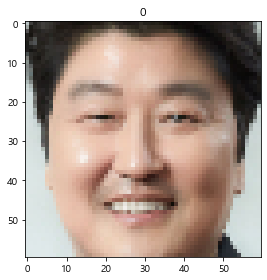

In [304]:
for i in range(len(test_list)):
    plt.subplot(1, len(test_list), i + 1)
    plt.title(i)
    plt.imshow(test_list[i])

plt.tight_layout()
plt.show()

[[1.3283996e-05 3.9579939e-09 1.3602230e-09 8.4356744e-10 5.4031690e-10
  3.5922991e-09 1.1980813e-07 3.5345913e-08 3.1657459e-07 2.1584201e-06
  9.9998271e-01 1.4271143e-06]]
0.9999827
label :  하정우


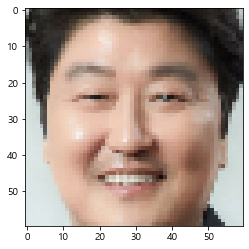

In [307]:
for test_img_t in test_list:
    plt.imshow(test_img_t)
    
    test_img_t = test_img_t.reshape(-1, img_w, img_h, 3)

    res1 = model.predict(test_img_t)
    print(res1)
    
    print(max(res1[0]))
    
    # 확률이 0.85 이상이면 인식, 그렇지 않으면 Unknown으로 처리
    if (max(res1[0]) >= 0.85):
        index = np.argmax(res1)
        print("label : ", label[index])
    else:
        print("label : Unknown")
    
    plt.show()
    print("\n\n")

# 결과 

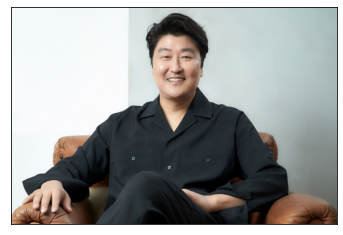



********************** 출연자 명단 **********************


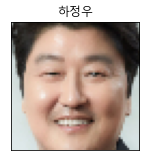

In [309]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

poster_img = cv2.cvtColor(poster_img, cv2.COLOR_RGB2BGR) # 포스터 이미지 원본
plt.imshow(poster_img)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.show()

print("\n\n********************** 출연자 명단 **********************")


num = 1
for test_img_t in test_list: # 포스터 얼굴
    test_img_t_1 = test_img_t.reshape(-1, img_w, img_h, 3)

    res1 = model.predict(test_img_t_1)
    
    if (max(res1[0]) >= 0.85):
        index = np.argmax(res1)
        name = label[index]
    else:
        name = "Unknown"
    
    w_num = (int(len(test_list) / 3) + 1)
    
    plt.subplot(w_num, 3, num)
    plt.title(name)
    plt.imshow(test_img_t)
    
    # 축 눈금 감추기
    ax = plt.gca()
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    
    num += 1

plt.tight_layout()
plt.show()